In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
import time

np.random.seed(42)

Consider the following dataset:


In [6]:
olivetti = fetch_olivetti_faces()
imgs = olivetti.images
labels = olivetti.target
X = imgs.reshape((400, 4096)).transpose()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\manse\scikit_learn_data


Visualize 10 randomly selected pictures with the corresponding labels.


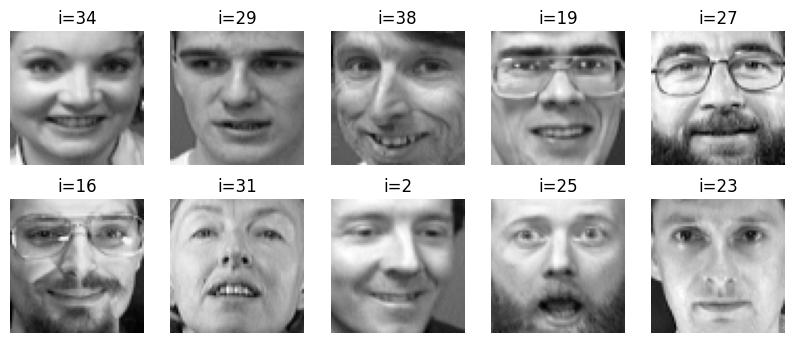

In [ ]:
indices = np.random.choice(400, 10)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(np.reshape(X[:, indices[i]], (64, 64)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title(f"i={labels[indices[i]]}")

Compute and visualize the average of the images.


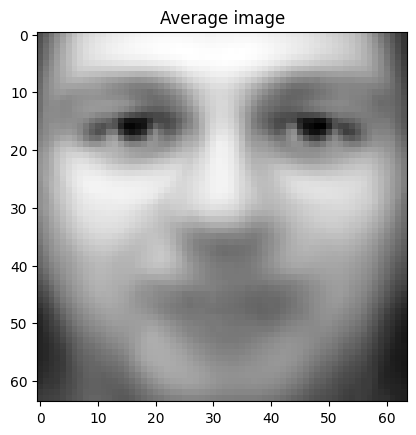

In [ ]:
X_average = X.mean(axis=1)

plt.imshow(X_average.reshape((64, 64)), cmap="gray")
plt.title("Average image")
plt.show()

Perform SVD by first setting the attribute `full_matrices = True` and then `full_matrices = False`. Comment the results.


In [ ]:
t0 = time.time()
U, s, VT = np.linalg.svd(X, full_matrices=True)
print("computational time:", time.time() - t0)
U.shape, s.shape, VT.shape

computational time: 2.933509588241577


((4096, 4096), (400,), (400, 400))

In [ ]:
t0 = time.time()
U, s, VT = np.linalg.svd(X, full_matrices=False)
print("computational time:", time.time() - t0)
U.shape, s.shape, VT.shape

computational time: 0.18024420738220215


((4096, 400), (400,), (400, 400))

By using full matrices we compute the complete version of the SVD where we obtain also the left singular vector because we fully compute U. On the other and by computing the economy SVD we still able to reconstruct exactly the initial matrix but we:

- Save up some space by representing only the part of U necessary to the reconstruction of X
- Save some computational time due to the fact that not the whole U is computed

Is important to highlight that both the version of the SVD present an exact factorization of X. This is because a subsection of U would be multiplied by the null vector meanwhile all component of U that are multiplied by the singular values are computed both cases. Note that in this case the truncation happens to be on U because X.shape(n,p) where p>n. If n>p we would have a truncation on VT


Plot the trend of the singular values and the fraction of "explained variance"


Text(0.5, 1.0, 'cumulate fraction of explained variance')

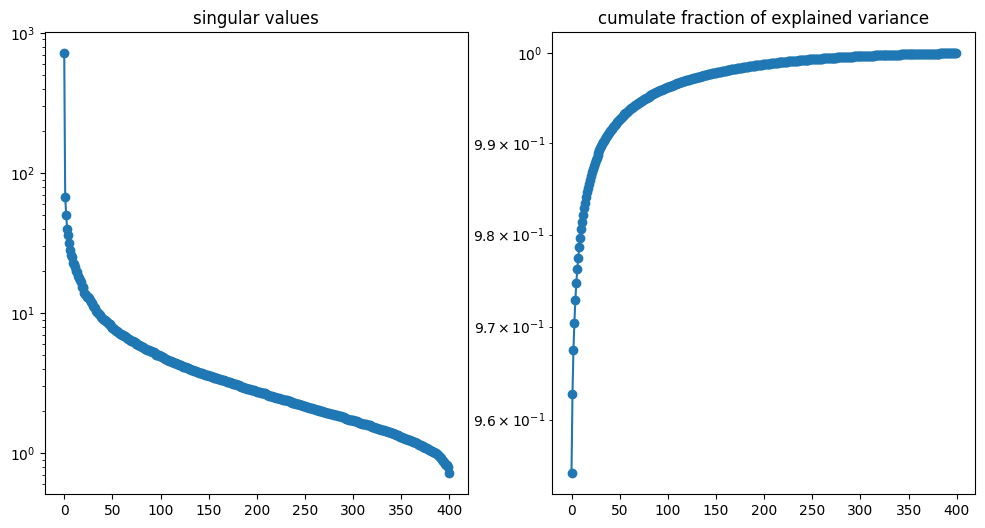

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].semilogy(s, "o-")
axs[0].set_title("singular values")

axs[1].semilogy(np.cumsum(s**2) / np.sum(s**2), "o-")
axs[1].set_title("cumulate fraction of explained variance")

Implement a function computing the randomized SVD of rank k for a generic matrix.


In [ ]:
def randomized_SVD(X, k):
    _, m = X.shape[0], X.shape[1]
    G = np.random.randn(m, k)  # Build the gaussian random matrix (namely G)
    Y = X @ G  # Define Y as the matrix multiplication
    Q, R = np.linalg.qr(Y)  # Apply the QR factorization on Y
    B = Q.T @ X  # Define the matrix B
    U_Y, s, VT = np.linalg.svd(B, full_matrices=False)  # Apply SVD on B
    U = Q @ U_Y  # Lifting up U_Y
    return U, s, VT

Set `k = 1,5,10,50,100` and plot the approximated singular values together with the exact ones.


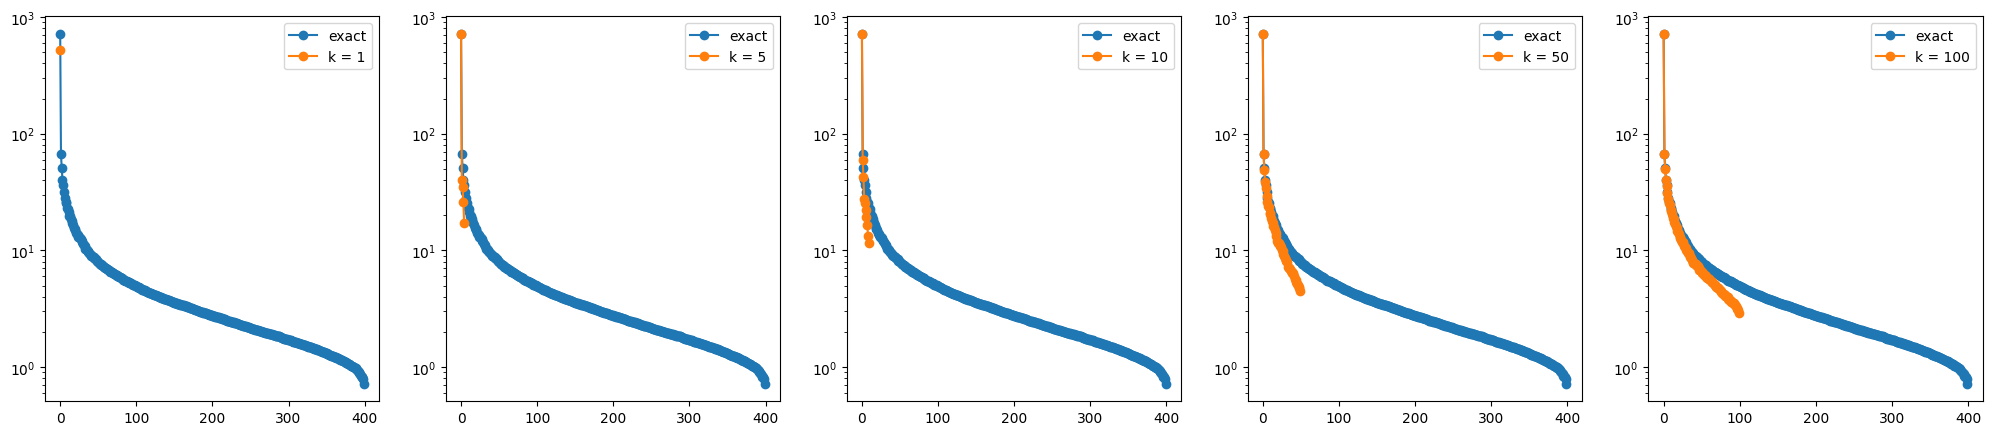

In [ ]:
ks = [1, 5, 10, 50, 100]

singular_values_list = []

for k in ks:
    _, randS, _ = randomized_SVD(X, k)
    singular_values_list.append(randS)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
axes = axes.reshape((-1,))

for i in range(5):
    axes[i].semilogy(s, "o-", label="exact")
    axes[i].semilogy(singular_values_list[i], "o-", label="k = %d" % ks[i])
    axes[i].legend()

Use PCA to perform dimensionality reduction on the dataset of images for rank `k = 1,5,10,50,100` by means of exact SVD. Compute the reconstruction error and plot it as a function of $k$. Comment the results.


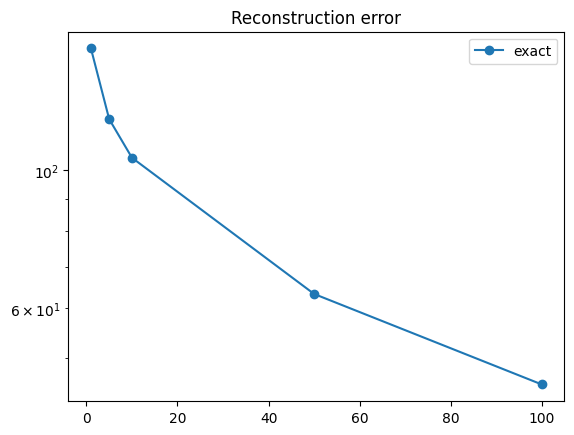

In [ ]:
U, s, VT = np.linalg.svd(X, full_matrices=False)

recon_error = []

for k in ks:
    X_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    error = np.linalg.norm(X - X_k)
    recon_error.append(error)

plt.semilogy(ks, recon_error, "o-", label="exact")
plt.title("Reconstruction error")
plt.legend()

Visualize the first 30 principal axes.


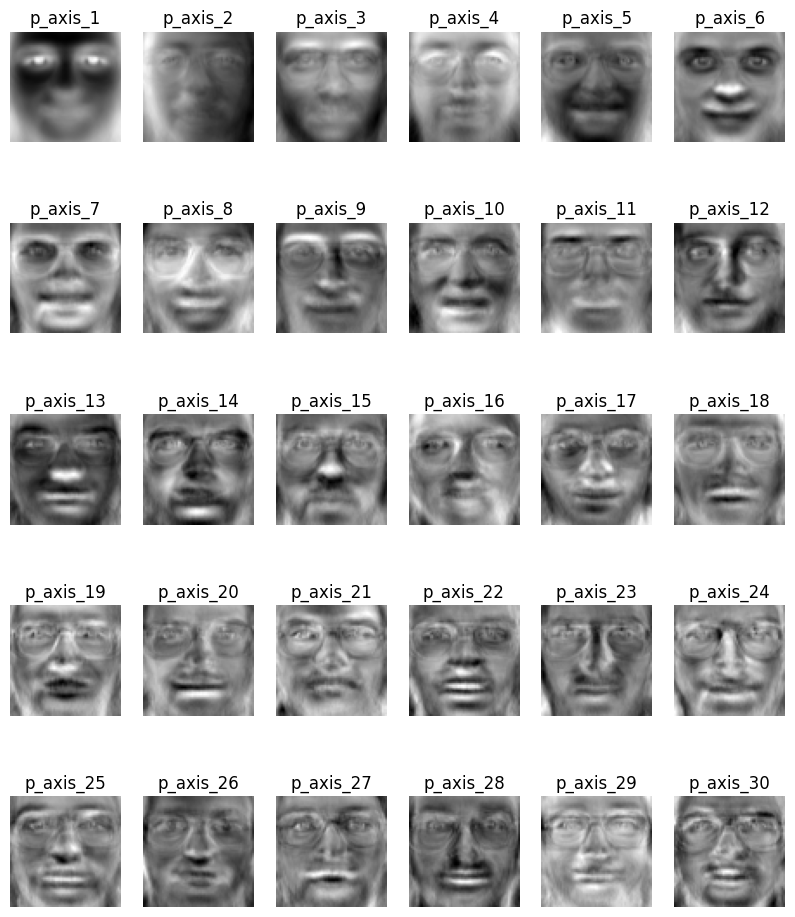

In [ ]:
fig, axs = plt.subplots(5, 6, figsize=(10, 12))
axs = axs.flatten()
for i in range(30):
    axs[i].imshow(np.reshape(U[:, i], (64, 64)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title(f"p_axis_{i+1}")

Compute the first two principal components related to the subset of images corresponding to labels = 0, 39.


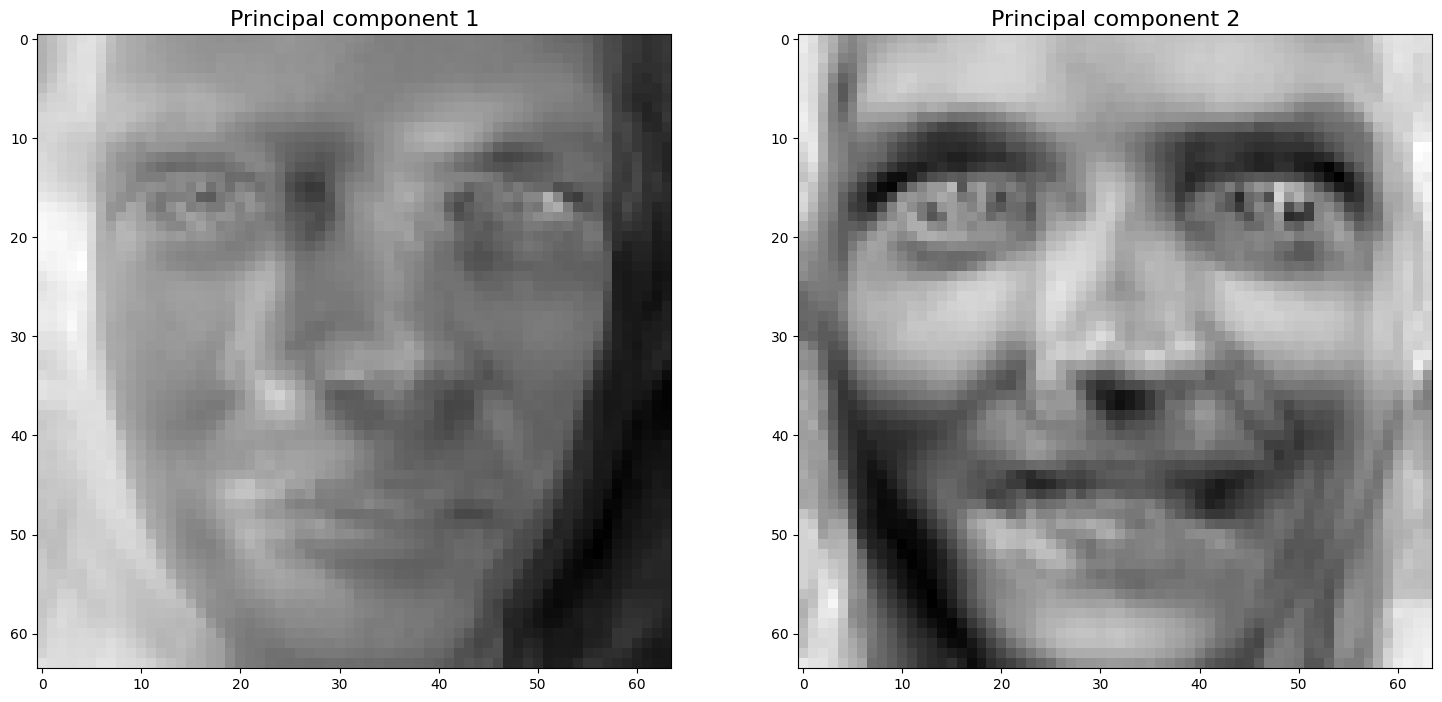

In [ ]:
zero_lebelled = np.where(labels == 0)[0]
thirtynine_labelled = np.where(labels == 39)[0]
selected = np.union1d(zero_lebelled, thirtynine_labelled)

X_sub = np.array([X[:, i] for i in selected]).T
X_sub_centered = X_sub - X_sub.mean(axis=1)[:, None]

U_sub, s_sub, VT_sub = np.linalg.svd(X_sub_centered)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 18))
for i in range(2):
    axs[i].imshow(U_sub[:, i].reshape((64, 64)), cmap="gray")
    axs[i].set_title(f"Principal component {i+1}", fontsize=16)
plt.show()

Create a scatterplot for the first 2 principal components of the subset of images grouped by label. Comment what you see.


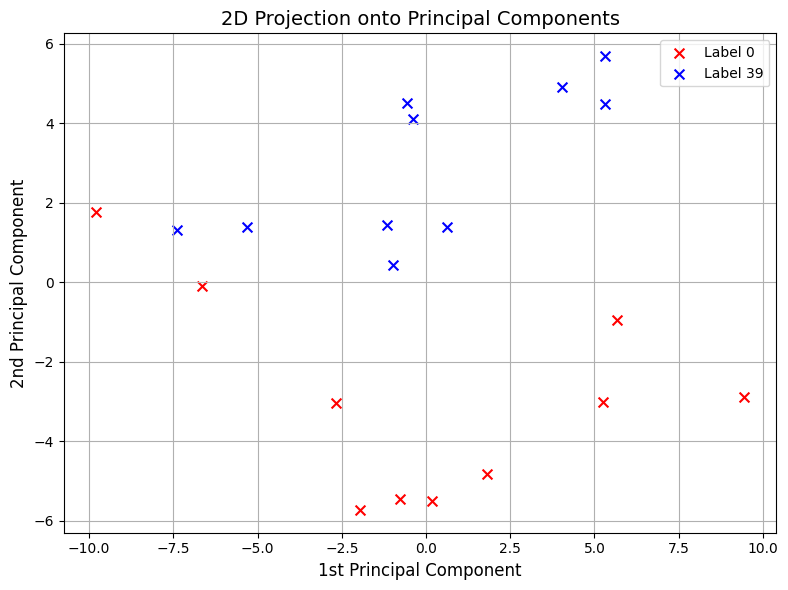

In [ ]:
fig = plt.figure(figsize=(8, 6))

for i in range(X_sub_centered.shape[1]):
    x = X_sub_centered[:, i].T @ U_sub[:, 0]
    y = X_sub_centered[:, i].T @ U_sub[:, 1]
    col = "r" if i < len(zero_lebelled) else "b"
    label = "Label 0" if i < len(zero_lebelled) else "Label 39"
    plt.scatter(
        x,
        y,
        marker="x",
        s=50,
        color=col,
        label=label if i in [0, len(zero_lebelled)] else "",
    )

plt.title("2D Projection onto Principal Components", fontsize=14)
plt.xlabel("1st Principal Component", fontsize=12)
plt.ylabel("2nd Principal Component", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We can observe that we can easily separate images of label 0 and images with label 39 by looking to the second principal component: if we set a boundary in 0 on the second principal component we can effecctivly classify the images


# Exercise 2


In [43]:
import jax
import jax.numpy as jnp

Consider the Ridge regression.

Write the loss function for the Ridge regression.


$$
L(w) = \lVert y - Xw \rVert^2 + \lambda \lVert w \rVert^2
$$


In [44]:
def ridge_loss(X, W, b, y, lam):
    y_pred = jnp.dot(W, X) + b
    return jnp.norm(y - y_pred) ** 2 + lam * jnp.norm(W) ** 2

Derive the expression of the solution $w^∗$ (weight vector) for the Ridge regression.


The goal is to select $w^*$ such that the Ridge Regression loss is minimized (we consider $y_{pred} = Xw$)

$$
w^* = argmin_w \lVert y - y_{pred} \rVert + \lambda \lVert w \rVert^2
$$

The function to minimize is the following quadratic function:

$$
f(w) = y^Ty - 2y_{pred}^Ty + y_{pred}^2 + \lambda w^Tw \\
f(w) = y^Ty - 2(Xw)^Ty+ (Xw+b)^2 + \lambda ww^T
$$

Given that the function is always convex (can be checked by computing the Hessian) and quadratic we have the minima when the derivative with respect to $w$ reaches $0$

$$
\frac{\partial{f}}{\partial{w}} = -2X^Ty + 2X^TXw + 2\lambda w \\
-2X^Ty + 2X^TXw^* + 2\lambda w^* = 0
$$

So $w^*$ is the w that satisfies the previous equation. In particular can be calculated as:

$$
w^* = (X^TX + \lambda I)^{-1}X^Ty
$$


Consider the dataset


In [45]:
np.random.seed(55)
x = np.arange(np.pi, 3 * np.pi, 0.1)
y = np.sin(x) + np.random.normal(0, 0.1, len(x))

and the following values of λ (regularization parameter) $$\lambda = 0, 10^{−32}, 10^{−16}, 10^{−8}, 10^{−2}, 1, 16, 32, 1024 $$


In [46]:
lambdas = [0, 1e-32, 1e-16, 1e-8, 1e-2, 1, 16, 32, 1024]

Compute the values of $w^*$ and plot the solution of the Ridge regression for the above mentioned values of $\lambda$.


In [ ]:
def ridge_optimal_w(X, y, lam):
    return np.linalg.inv(X.T @ X + lam * np.identity(X.shape[1])) @ X.T @ y

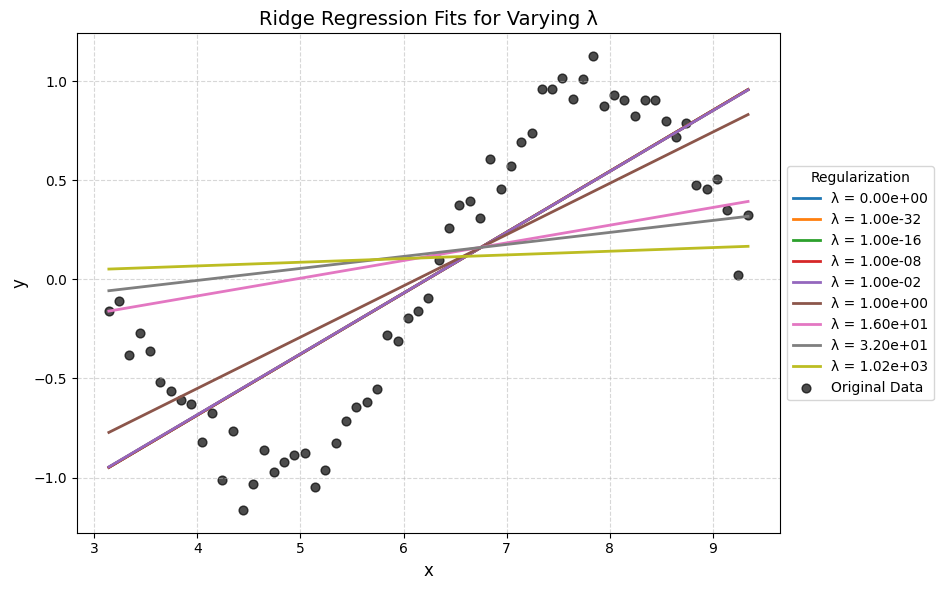

In [ ]:
plt.figure(figsize=(8, 6))

X = np.column_stack((np.ones_like(x), x))

for lam in lambdas:
    w_star = ridge_optimal_w(X, y, lam)
    y_pred = X @ w_star
    plt.plot(x, y_pred, label=f"λ = {lam:.2e}", linewidth=2)

plt.scatter(x, y, color="black", label="Original Data", s=40, alpha=0.7, edgecolors="k")

plt.title("Ridge Regression Fits for Varying λ", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Place legend outside the plot on the right
plt.legend(title="Regularization", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

Comment the obtained results.


Ridge regression is still a linear model that aims to find the best-fitting line approximating the data. However, if the original data do not follow a linear pattern, ridge regression cannot provide a good approximation.

We can observe that as the regularization parameter
λ increases, the slope of the fitted line decreases. This happens because ridge regression penalizes large coefficients, and increasing
λ strengthens this penalty, leading to smaller weights and thus flatter slopes.
